In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

sns.set(style="whitegrid")  # nicer plot style

# Importing Data Over From CSV

In [2]:
# Folder where CSVs are stored
path = "" # Relative path

# Find all CSV files in the folder
csv_files = glob.glob(os.path.join(path, "*.csv"))

dfs = []
for file in csv_files:
    # extract algorithm name from file name
    algo_name = os.path.basename(file).replace("Result.csv", "")
    
    # read the CSV
    df = pd.read_csv(file)
    
    # add a column to identify the algorithm
    df["Algorithm"] = algo_name
    
    # store in list
    dfs.append(df)

# Combine all CSVs into one DataFrame
data = pd.concat(dfs, ignore_index=True)

# Check the first few rows
data.head()

,DataLength,ChunkSize,Time(microseconds),ComparisonCount,Algorithm
0,1000,2,65,8697,iterativeHybridSort
1,1000,4,57,8758,iterativeHybridSort
2,1000,8,62,9126,iterativeHybridSort
3,1000,16,48,10296,iterativeHybridSort
4,1000,32,56,13410,iterativeHybridSort


In [3]:
# Filter only hybrid algorithms
hybrids = data[data["Algorithm"].str.contains("Hybrid")]
merge = data[data["Algorithm"].str.contains("Merge")]

# Optionally, create a new column combining algorithm type and chunk size for easier plotting
hybrids["Algorithm"] = hybrids["Algorithm"] + "_" + hybrids["ChunkSize"].astype(str)

all_algos = pd.concat([hybrids, merge], ignore_index=True)
all_algos.head()

C:\Users\Grey Bunny\AppData\Local\Temp\ipykernel_27572\709497363.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hybrids["Algorithm"] = hybrids["Algorithm"] + "_" + hybrids["ChunkSize"].astype(str)


,DataLength,ChunkSize,Time(microseconds),ComparisonCount,Algorithm
0,1000,2,65,8697,iterativeHybridSort_2
1,1000,4,57,8758,iterativeHybridSort_4
2,1000,8,62,9126,iterativeHybridSort_8
3,1000,16,48,10296,iterativeHybridSort_16
4,1000,32,56,13410,iterativeHybridSort_32


# Graph to Show Performance Up To Array Length of 16 Million 

C:\Users\Grey Bunny\AppData\Local\Temp\ipykernel_27572\3525952056.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


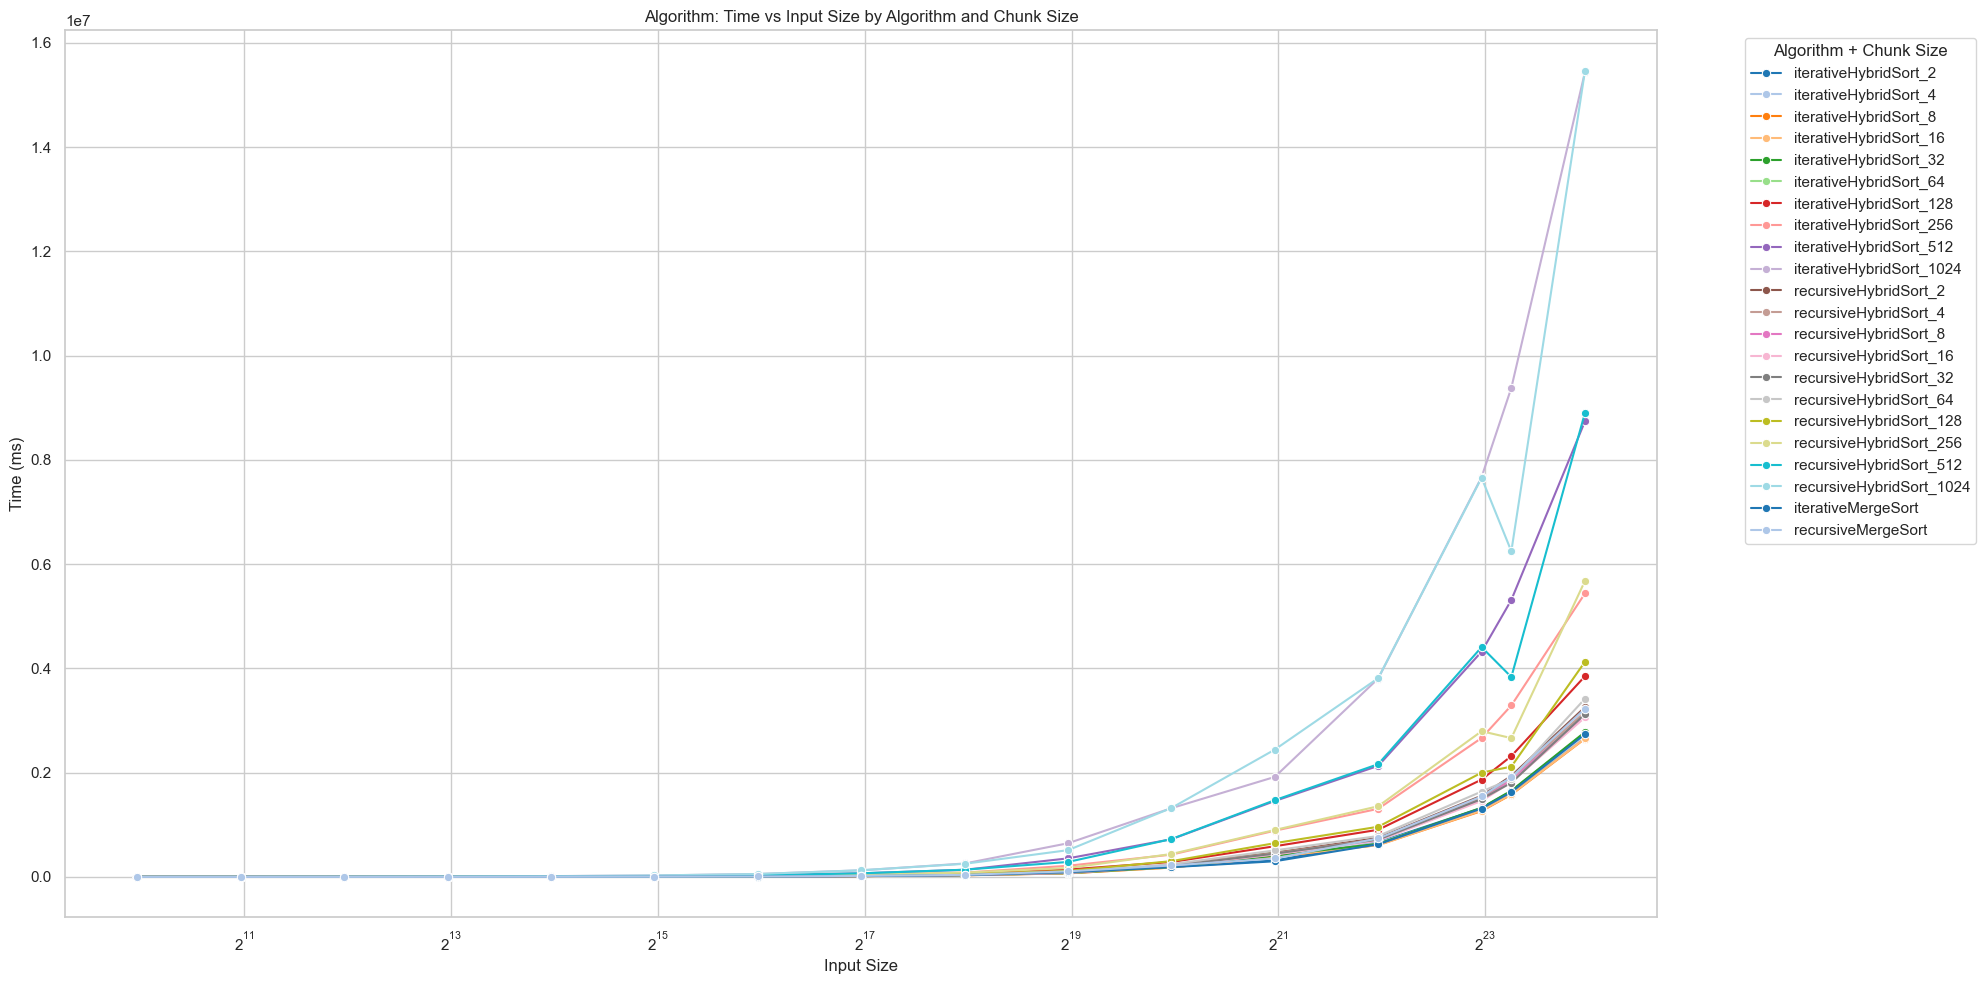

In [4]:
plt.figure(figsize=(20,10))

sns.lineplot(
    data=all_algos,
    x="DataLength",
    y="Time(microseconds)",
    hue="Algorithm",   # color by algorithm+chunk size
    marker="o",          # show scatter points
    palette = "tab20",
    ci = None
)

plt.title("Algorithm: Time vs Input Size by Algorithm and Chunk Size")
plt.xscale("log", base=2)
plt.xlabel("Input Size")
plt.ylabel("Time (ms)")
plt.legend(title="Algorithm + Chunk Size", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\Grey Bunny\AppData\Local\Temp\ipykernel_27572\3557025739.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


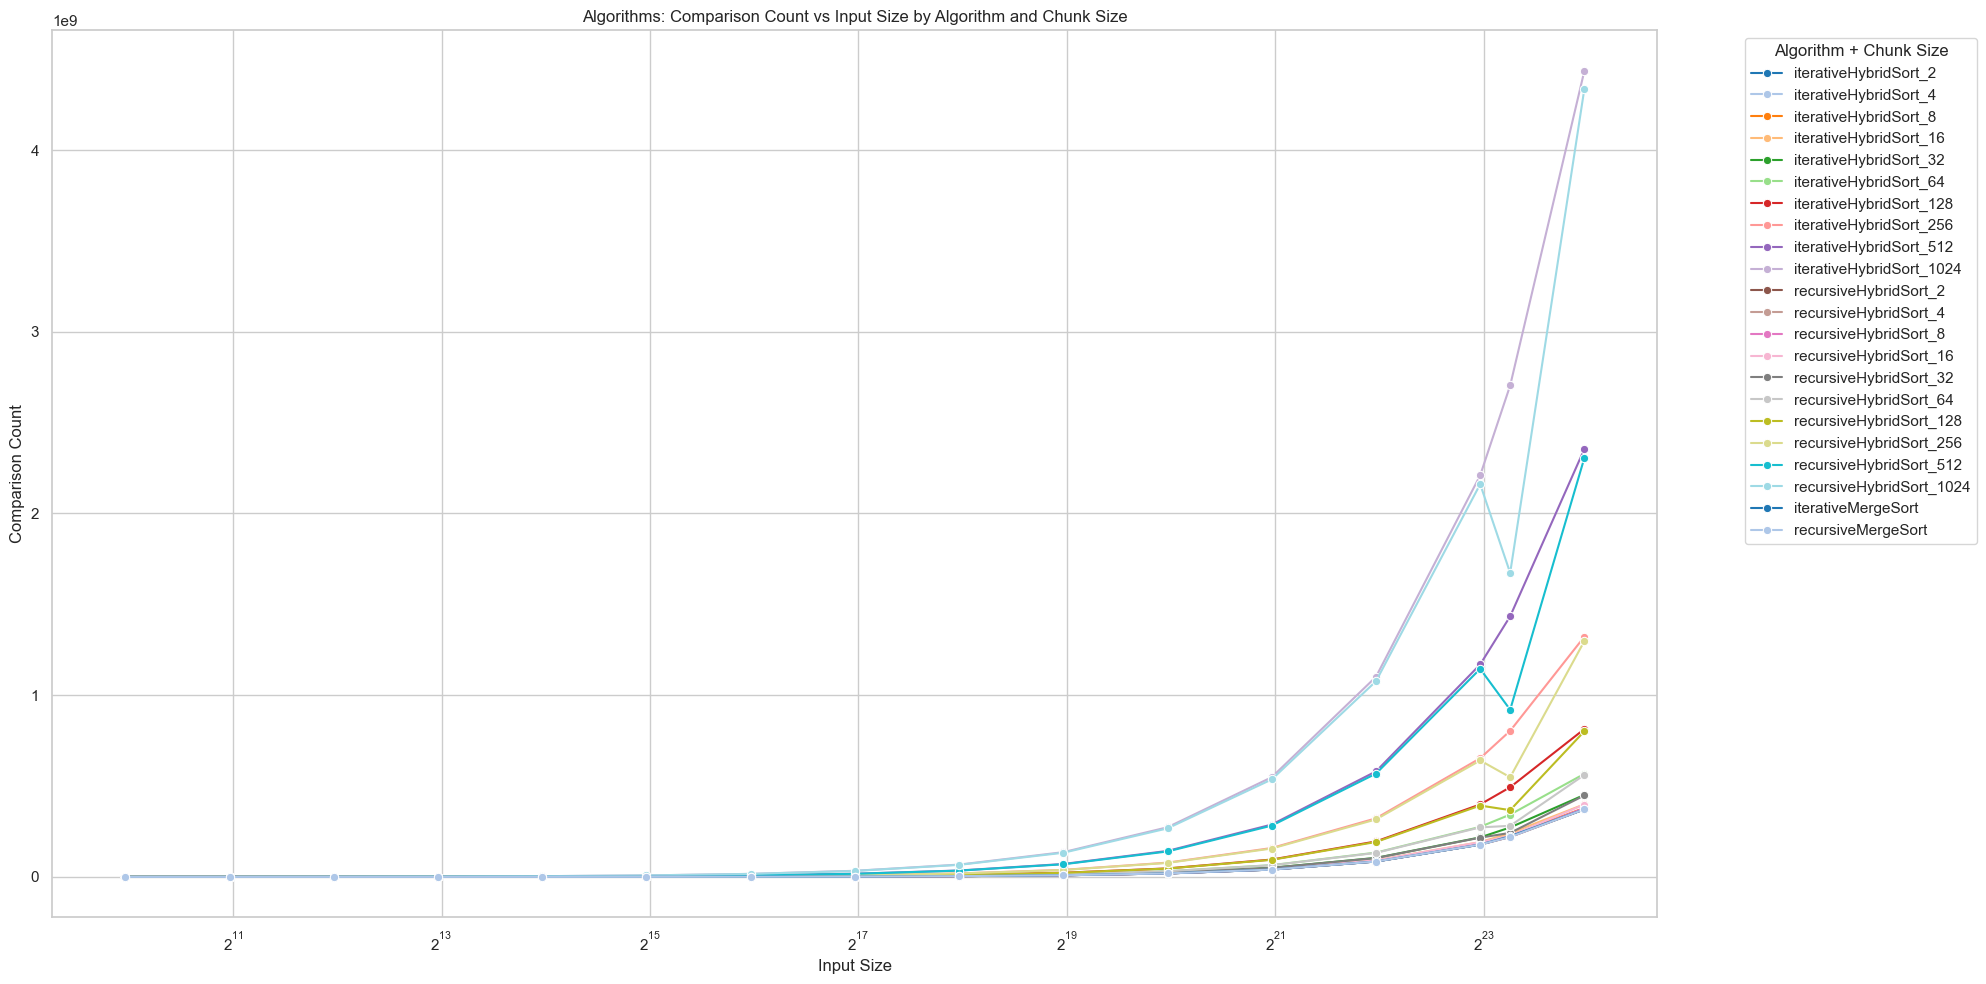

In [5]:
plt.figure(figsize=(20,10))

sns.lineplot(
    data=all_algos,
    x="DataLength",
    y="ComparisonCount",
    hue="Algorithm",   # color by algorithm+chunk size
    marker="o",          # show scatter points
    palette = "tab20",
    ci = None
)

plt.title("Algorithms: Comparison Count vs Input Size by Algorithm and Chunk Size")
plt.xscale("log", base=2)
plt.xlabel("Input Size")
plt.ylabel("Comparison Count")
plt.legend(title="Algorithm + Chunk Size", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Filter Graph to Chunk Size < 64 
This eliminate the phenono

In [6]:

filtered_algos = all_algos[(all_algos["ChunkSize"].isna()) | (all_algos["ChunkSize"] < 64)]
filtered_algos.head()

,DataLength,ChunkSize,Time(microseconds),ComparisonCount,Algorithm
0,1000,2,65,8697,iterativeHybridSort_2
1,1000,4,57,8758,iterativeHybridSort_4
2,1000,8,62,9126,iterativeHybridSort_8
3,1000,16,48,10296,iterativeHybridSort_16
4,1000,32,56,13410,iterativeHybridSort_32


C:\Users\Grey Bunny\AppData\Local\Temp\ipykernel_27572\3821339763.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


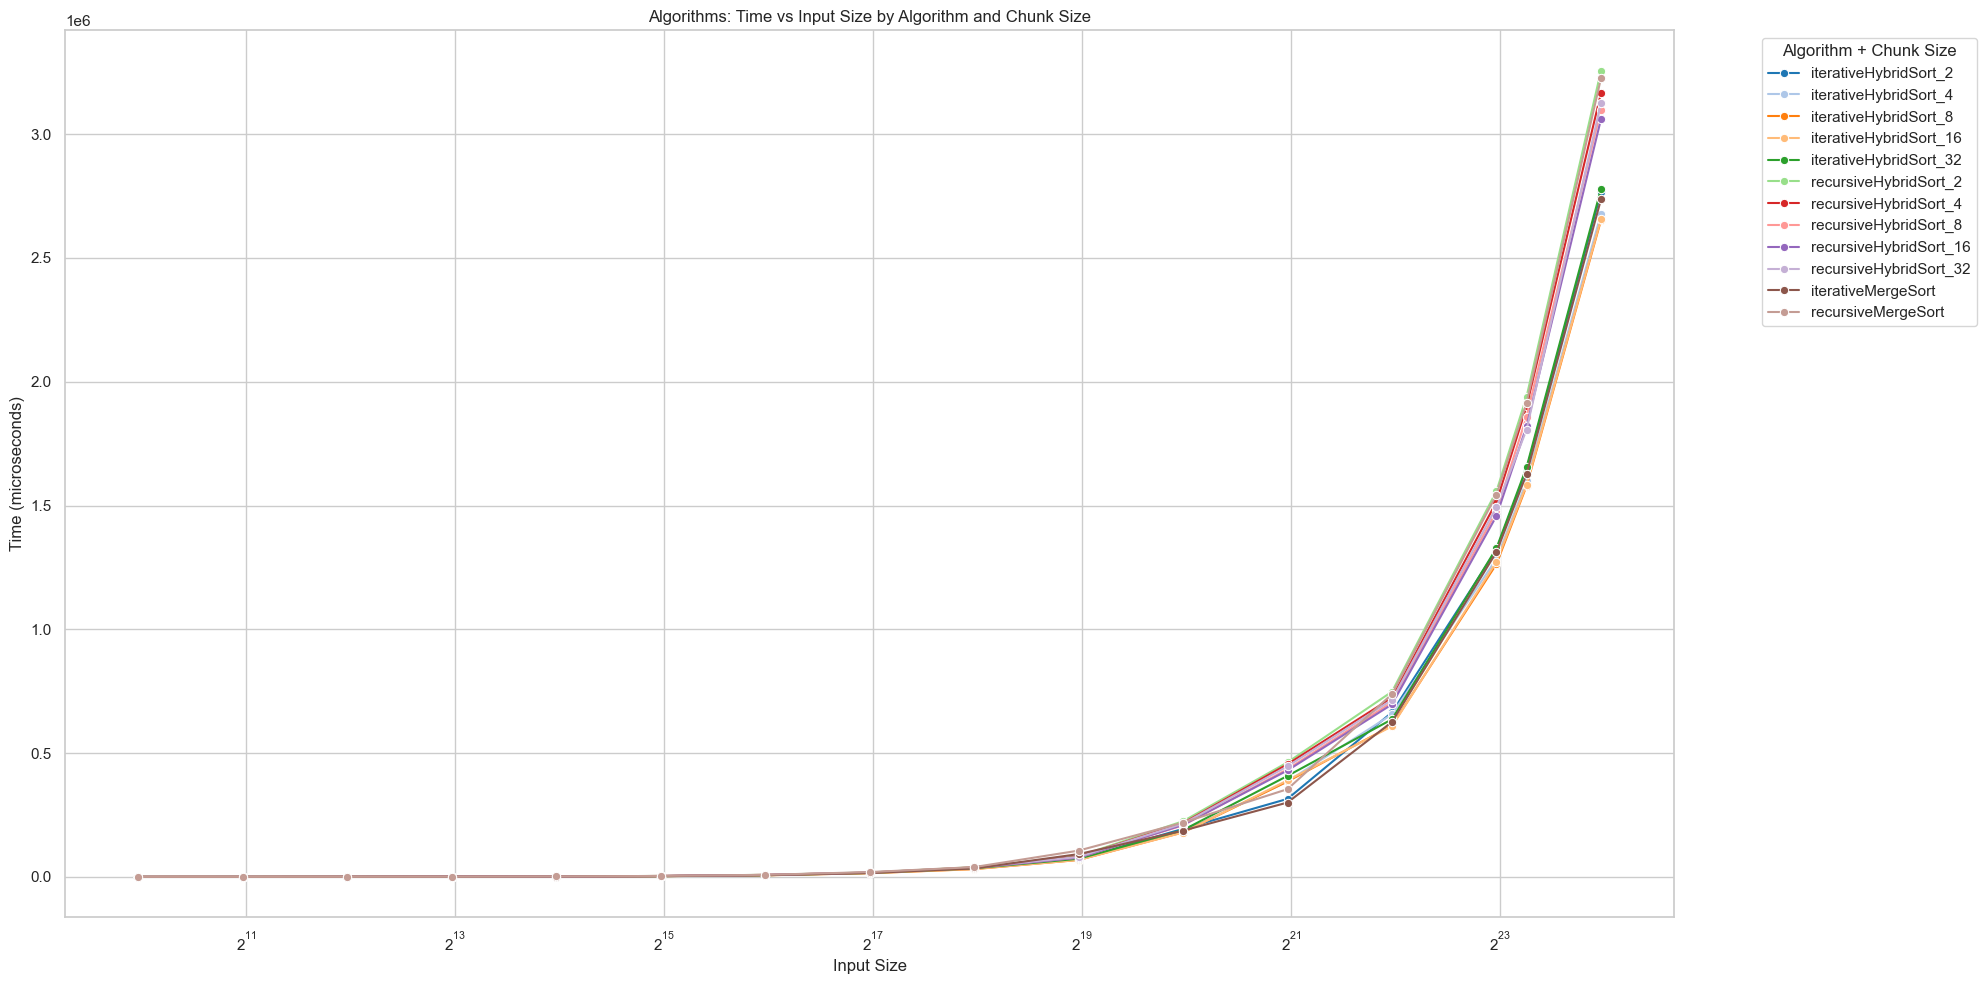

In [7]:
plt.figure(figsize=(20,10))

sns.lineplot(
    data=filtered_algos,
    x="DataLength",
    y="Time(microseconds)",
    hue="Algorithm",   # color by algorithm+chunk size
    marker="o",          # show scatter points
    palette = "tab20",
    ci = None
)

plt.title("Algorithms: Time vs Input Size by Algorithm and Chunk Size")
plt.xscale("log", base=2)
plt.xlabel("Input Size")
plt.ylabel("Time (microseconds)")
plt.legend(title="Algorithm + Chunk Size", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\Grey Bunny\AppData\Local\Temp\ipykernel_27572\868540469.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


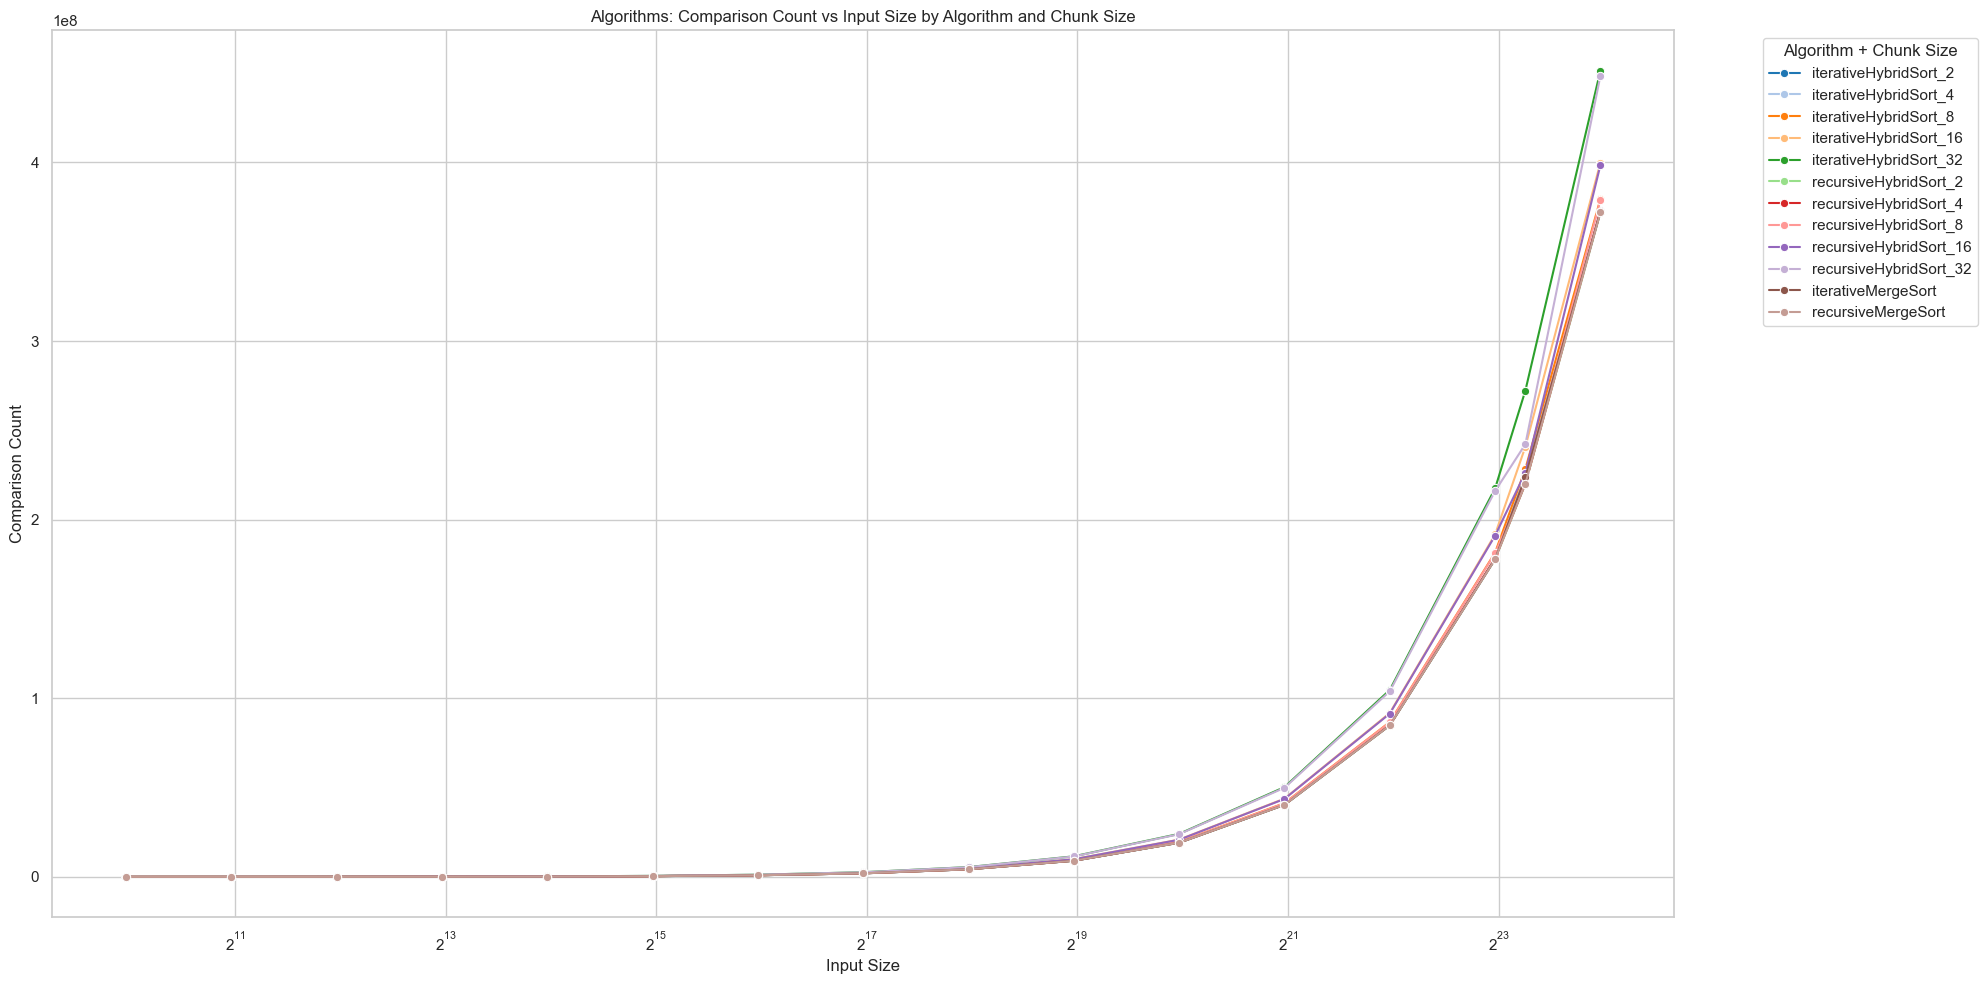

In [8]:
plt.figure(figsize=(20,10))

sns.lineplot(
    data=filtered_algos,
    x="DataLength",
    y="ComparisonCount",
    hue="Algorithm",   # color by algorithm+chunk size
    marker="o",          # show scatter points
    palette = "tab20",
    ci = None
)

plt.title("Algorithms: Comparison Count vs Input Size by Algorithm and Chunk Size")
plt.xscale("log", base=2)
plt.xlabel("Input Size")
plt.ylabel("Comparison Count")
plt.legend(title="Algorithm + Chunk Size", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()